In [1]:
#%pip install mlxtend

In [2]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [3]:
df=pd.DataFrame()

In [4]:
df["X1"]=[1,2,3,4,5,6,6,7,9,9]
df["X2"]=[5,3,6,8,1,9,5,8,9,2]
df["label"]=[1,1,0,1,0,1,0,1,0,0]

In [5]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [6]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

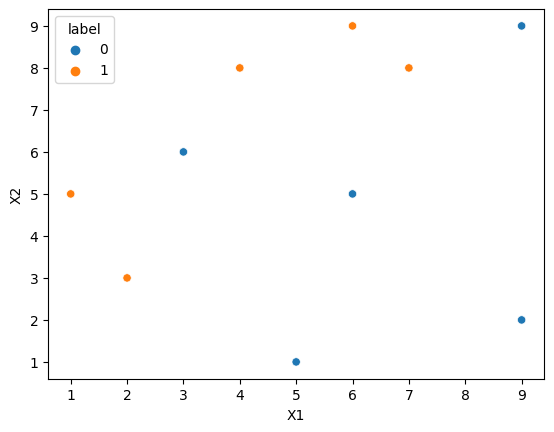

In [7]:
sns.scatterplot(x=df["X1"],y=df["X2"],hue=df["label"])


In [8]:
df.shape

(10, 3)

In [9]:
#no of rows
df.shape[0]

10

In [10]:
df["sample_weights"]=1/df.shape[0]

In [11]:
df

,X1,X2,label,sample_weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [12]:
X=df.iloc[:,:2]

In [13]:
X

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [14]:
y=df["label"]

In [15]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt1=DecisionTreeClassifier(max_depth=1)

In [18]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [19]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

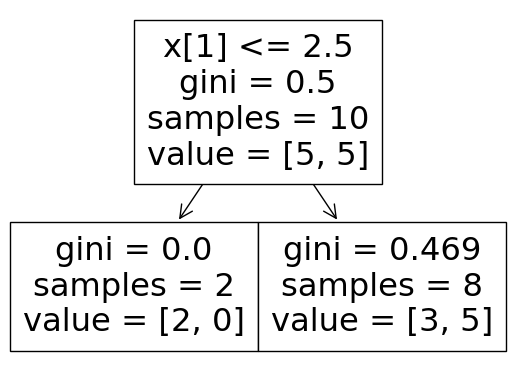

In [20]:
plot_tree(dt1.fit(X,y))

c:\Users\madhu\anaconda3\envs\debu\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

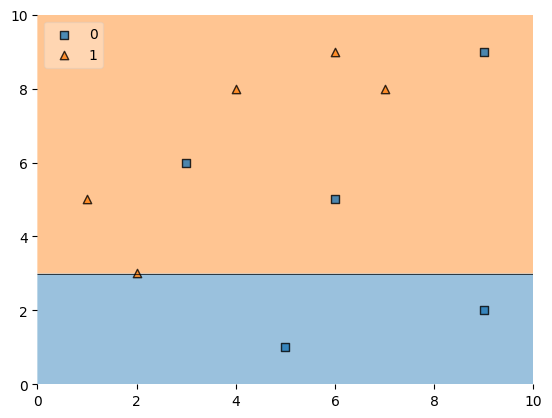

In [21]:
# plot decision booundry 
plot_decision_regions(np.array(X),np.array(y),clf=dt1,legend=2)

In [22]:
df["pred1"]=dt1.predict(X)

In [23]:
df

,X1,X2,label,sample_weights,pred1
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [24]:
# performance of the stump 
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [25]:
alpha=calculate_model_weight(0.3)

In [26]:
alpha

0.42364893019360184

In [33]:
# claculate the update weight 

def update_weight(row,alpha=0.423):
    if row["label"]==row["pred1"]:
        return row["sample_weights"]*np.exp(-alpha)
    else:
        return row["sample_weights"]*np.exp(alpha)

In [34]:
df["updated_weights"]=df.apply(update_weight,axis=1)

In [35]:
df

,X1,X2,label,sample_weights,pred1,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [36]:
df['sample_weights'].sum()

1.0

In [37]:
df["updated_weights"].sum()

0.9165153319682015

In [39]:
df["normalized_weights"]=df["updated_weights"]/df['updated_weights'].sum()

In [40]:
df

,X1,X2,label,sample_weights,pred1,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [41]:
df["normalized_weights"].sum()

1.0

In [42]:
np.cumsum(df["normalized_weights"])

0    0.071475
1    0.142950
2    0.309508
3    0.380983
4    0.452458
5    0.523933
6    0.690492
7    0.761967
8    0.928525
9    1.000000
Name: normalized_weights, dtype: float64

In [43]:
df["cumsum_upper"]=np.cumsum(df["normalized_weights"])
df["cumsum_lower"]=df["cumsum_upper"]-df["normalized_weights"]
df[["X1","X2","label","pred1","updated_weights","cumsum_lower","cumsum_upper"]]

,X1,X2,label,pred1,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,1,0.065508,0.000000,0.071475
1,2,3,1,1,0.065508,0.071475,0.142950
2,3,6,0,1,0.152653,0.142950,0.309508
3,4,8,1,1,0.065508,0.309508,0.380983
4,5,1,0,0,0.065508,0.380983,0.452458
5,6,9,1,1,0.065508,0.452458,0.523933
6,6,5,0,1,0.152653,0.523933,0.690492
7,7,8,1,1,0.065508,0.690492,0.761967
8,9,9,0,1,0.152653,0.761967,0.928525
9,9,2,0,0,0.065508,0.928525,1.000000


In [54]:
indexes=[]

for i in range(df.shape[0]):
    a=np.random.random()
    for index,row in df.iterrows():
        if a>row["cumsum_lower"] and a<row["cumsum_upper"]:
            indexes.append(index)
            
    

In [55]:
indexes

[8, 3, 6, 1, 1, 2, 0, 3, 2, 1]

In [56]:
second_df=df.iloc[indexes][["X1","X2","label","sample_weights"]]

In [57]:
second_df

,X1,X2,label,sample_weights
8,9,9,0,0.1
3,4,8,1,0.1
6,6,5,0,0.1
1,2,3,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
0,1,5,1,0.1
3,4,8,1,0.1
2,3,6,0,0.1
1,2,3,1,0.1


In [58]:
dt2=DecisionTreeClassifier(max_depth=1)

In [71]:
X=second_df.iloc[:,:2].values
y=second_df.iloc[:,2].values

In [70]:
second_df.iloc[:,2]

8    0
3    1
6    0
1    1
1    1
2    0
0    1
3    1
2    0
1    1
Name: label, dtype: int64

In [72]:
X

array([[9, 9],
       [4, 8],
       [6, 5],
       [2, 3],
       [2, 3],
       [3, 6],
       [1, 5],
       [4, 8],
       [3, 6],
       [2, 3]], dtype=int64)

In [73]:
y

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [74]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]')]

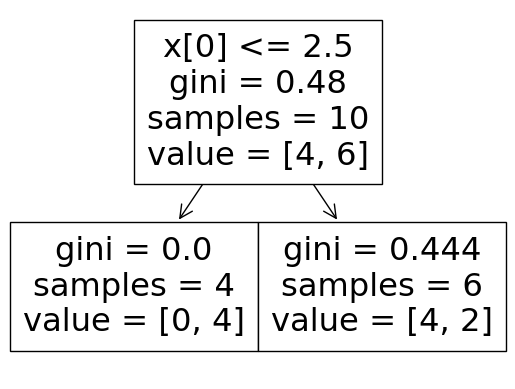

In [75]:
plot_tree(dt2)

<Axes: >

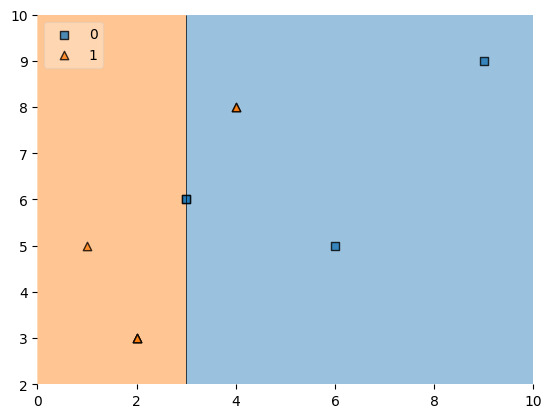

In [76]:
plot_decision_regions(X,y,clf=dt2,legend=2)

In [77]:
second_df["pred2"]=dt2.predict(X)

In [78]:
second_df

,X1,X2,label,sample_weights,pred2
8,9,9,0,0.1,0
3,4,8,1,0.1,0
6,6,5,0,0.1,0
1,2,3,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
0,1,5,1,0.1,1
3,4,8,1,0.1,0
2,3,6,0,0.1,0
1,2,3,1,0.1,1


In [80]:
alpha2=calculate_model_weight(0.2)

In [81]:
alpha2

0.6931471805599453

In [82]:
def update_row_weights(row,alpha=0.69):
    if row['label'] == row['pred2']:
        return row['sample_weights'] * np.exp(-alpha)
    else:
        return row['sample_weights'] * np.exp(alpha)

In [83]:
second_df["updated_weights"]=second_df.apply(update_row_weights,axis=1)

In [84]:
second_df

,X1,X2,label,sample_weights,pred2,updated_weights
8,9,9,0,0.1,0,0.050158
3,4,8,1,0.1,0,0.199372
6,6,5,0,0.1,0,0.050158
1,2,3,1,0.1,1,0.050158
1,2,3,1,0.1,1,0.050158
2,3,6,0,0.1,0,0.050158
0,1,5,1,0.1,1,0.050158
3,4,8,1,0.1,0,0.199372
2,3,6,0,0.1,0,0.050158
1,2,3,1,0.1,1,0.050158


In [86]:
second_df["normalized_weights"]=second_df["updated_weights"]/second_df["updated_weights"].sum()

In [87]:
second_df

,X1,X2,label,sample_weights,pred2,updated_weights,normalized_weights
8,9,9,0,0.1,0,0.050158,0.062697
3,4,8,1,0.1,0,0.199372,0.249213
6,6,5,0,0.1,0,0.050158,0.062697
1,2,3,1,0.1,1,0.050158,0.062697
1,2,3,1,0.1,1,0.050158,0.062697
2,3,6,0,0.1,0,0.050158,0.062697
0,1,5,1,0.1,1,0.050158,0.062697
3,4,8,1,0.1,0,0.199372,0.249213
2,3,6,0,0.1,0,0.050158,0.062697
1,2,3,1,0.1,1,0.050158,0.062697


In [89]:
second_df["normalized_weights"].sum()

1.0

In [92]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

second_df[['X1','X2','label','sample_weights','pred2','updated_weights','cumsum_lower','cumsum_upper']]


,X1,X2,label,sample_weights,pred2,updated_weights,cumsum_lower,cumsum_upper
8,9,9,0,0.1,0,0.050158,0.000000,0.062697
3,4,8,1,0.1,0,0.199372,0.062697,0.311910
6,6,5,0,0.1,0,0.050158,0.311910,0.374607
1,2,3,1,0.1,1,0.050158,0.374607,0.437303
1,2,3,1,0.1,1,0.050158,0.437303,0.500000
2,3,6,0,0.1,0,0.050158,0.500000,0.562697
0,1,5,1,0.1,1,0.050158,0.562697,0.625393
3,4,8,1,0.1,0,0.199372,0.625393,0.874607
2,3,6,0,0.1,0,0.050158,0.874607,0.937303
1,2,3,1,0.1,1,0.050158,0.937303,1.000000


In [96]:
indexes=[]
for i in range(second_df.shape[0]):
    a=np.random.random()
    for index,row in second_df.iterrows():
        if a>row["cumsum_lower"] and a<row["cumsum_upper"]:
            indexes.append(index)

In [97]:
indexes

[2, 3, 3, 1, 3, 0, 3, 2, 3, 3]

In [98]:
third_df=second_df.iloc[indexes]

In [100]:
third_df

,X1,X2,label,sample_weights,pred2,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
6,6,5,0,0.1,0,0.050158,0.062697,0.374607,0.311910
1,2,3,1,0.1,1,0.050158,0.062697,0.437303,0.374607
1,2,3,1,0.1,1,0.050158,0.062697,0.437303,0.374607
3,4,8,1,0.1,0,0.199372,0.249213,0.311910,0.062697
1,2,3,1,0.1,1,0.050158,0.062697,0.437303,0.374607
8,9,9,0,0.1,0,0.050158,0.062697,0.062697,0.000000
1,2,3,1,0.1,1,0.050158,0.062697,0.437303,0.374607
6,6,5,0,0.1,0,0.050158,0.062697,0.374607,0.311910
1,2,3,1,0.1,1,0.050158,0.062697,0.437303,0.374607
1,2,3,1,0.1,1,0.050158,0.062697,0.437303,0.374607


In [101]:
alpha,alpha2

(0.42364893019360184, 0.6931471805599453)

In [102]:
query=np.array([[6,5]])

In [103]:
dt1.predict(query)

c:\Users\madhu\anaconda3\envs\debu\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [104]:
dt2.predict(query)

array([0], dtype=int64)

In [105]:
f=alpha*(1)+alpha2*(-1)

In [106]:
f

-0.26949825036634345

In [107]:
final_pred=np.sign(f)

In [108]:
final_pred

-1.0

In [109]:
query2=np.array([[2,3]])

In [110]:
dt1.predict(query2)

c:\Users\madhu\anaconda3\envs\debu\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [111]:
dt2.predict(query2)

array([1], dtype=int64)

In [116]:
f2=alpha*(1)+alpha2*(1)

In [117]:
final_predict=np.sign(f2)

In [118]:
final_predict

1.0